# QUESTION 1

## Imports

In [ ]:
import numpy as np
import pandas as pd
import torch
from torchsummary import summary
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In this Exercise, you're going to train a neural network using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist). Fashion-MNIST is a set of 28 x 28 pixel greyscale images of clothes.

Some of you may have worked with this dataset before, it's a classic one. This dataset is ideal for your first PyTorch exercise. Below is a sample of some of the images in the dataset. We have 10 classes in the dataset: T-shirt/tops, Trousers, Pullovers, Dresses, Coats, Sandals, Shirts, Sneakers, Bags, and Ankle Boots.

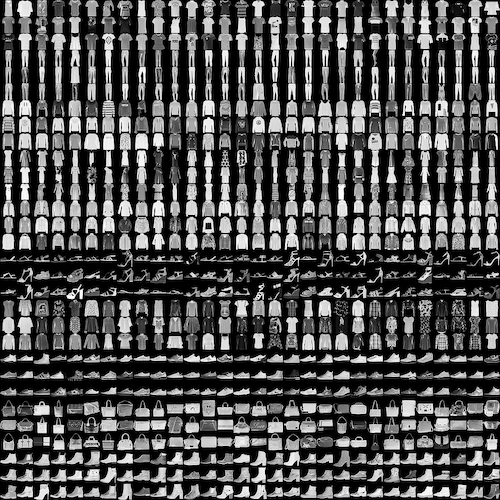

The goal of this question is to develop a network that can correctly predict a given image of "fashion" into one of the 10 classes. This is a multi-class classification task, our model should spit out 10 probabilities for a given image, one probability for each class. Ideally, the class our model predicts with maximum probability is the correct one.

The below cell will download and load in the Fashion-MNIST data for you. Note the following:

- Think of images as `ndarrays` of data, in the case of grayscale images like we have here, each pixel has a value between 0 and 1 indicating how "bright" that pixel is. So each image here is just a 28 x 28 `ndarray` with values ranging from 0 to 1 (when we get to colour images, it's exactly the same, except each pixel has 3 values, one for each of the colour channels Red, Blue, Green. If we had colour images here our array would be 28 x 28 x 3).

- `transform`: applies some transformations to the images. Here we are converting the data to tensors.

- `torch.utils.data.DataLoader`: these are _data loaders_. Think of them as generators. During training/testing, we can easily query them for a batch of data of size `BATCH_SIZE`.

The following cell might give you a warning, but no need to worry:

In [ ]:
BATCH_SIZE = 64

# Define a transform to normalize the data, which usually helps with training
transform = transforms.Compose([transforms.ToTensor()])

# Download data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)

# Create data loaders (these are just generators that will give us `batch_size` samples as a time)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True)

# Class labels
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 331kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.20MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 24.9MB/s]


Let's plot a random image (run this cell as many times as you like to see different images):

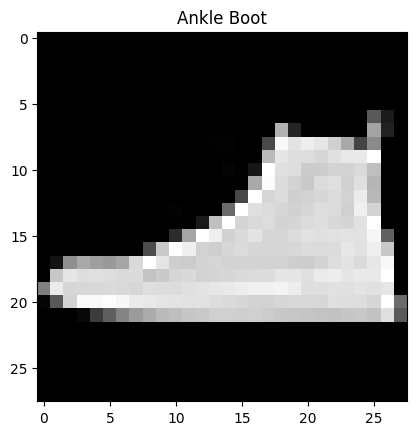

In [ ]:
image, label = next(iter(trainloader))  # Get a random batch of 64 images
i = np.random.randint(0, 64)            # Choose one image at random
plt.imshow(image[i, 0], cmap='gray')    # Plot
plt.title(class_labels[label[i]]);

## 1.1

{accuracy: 3}

Notice in the plot above that our image is 28 x 28 pixels. How do we feed this into a neural network? Well we can flatten it out into a vector of 784 elements (28 x 28 = 784) and create 784 input nodes. We'll do this later on. For now, all I want you to do is create a new class for our PyTorch neural network model defining a classifier with the following architecture:

- hidden layer that goes from `input_size` -> 256 nodes

- ReLU activation function
- hidden layer that goes from 256 nodes -> 128 nodes
- ReLU activation function
- hidden layer that goes from 128 nodes -> 64 nodes
- ReLU activation function
- output layer that goes from 64 nodes -> `output_size` nodes

Following is some starter code to fill in.

**Note:** When we create our model in a later exercise we will specify `input_size=784` and `output_size=10`. The `784` is the flattened 28 x 28 image and the output size of 10 is so that we have one node for each item of clothing (remember we have 10 classes), and each node will contain the probability of that item of clothing being the one in a particular input image.

In [ ]:
class Classifier(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.main = ...

    def forward(self, x):
        out = self.main(x)
        return out

## 1.2

{accuracy: 2}

If your model has `input_size=784` and `output_size=10`, how many parameters does your model have? Write your manual calculations, and verify your result using `torchsummary.summary()`.

In [ ]:
# YOUR SOLUTION HERE
# Parameter calculation:
# Layer 1: 784 -> 256
# Weights: 784 * 256 = 200,704
# Biases: 256
# Total: 200,704 + 256 = 200,960

# Layer 2: 256 -> 128
# Weights: 256 * 128 = 32,768
# Biases: 128
# Total: 32,768 + 128 = 32,896

# Layer 3: 128 -> 64
# Weights: 128 * 64 = 8,192
# Biases: 64
# Total: 8,192 + 64 = 8,256

# Output Layer: 64 -> 10
# Weights: 64 * 10 = 640
# Biases: 10
# Total: 640 + 10 = 650

# Total parameters: 200,960 + 32,896 + 8,256 + 650 = 242,762

# Define the model
class Classifier(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )

    def forward(self, x):
        return self.main(x)

# Create and summarize the model
model = Classifier(input_size=784, output_size=10)
summary(model, input_size=(784,))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]         200,960
              ReLU-2                  [-1, 256]               0
            Linear-3                  [-1, 128]          32,896
              ReLU-4                  [-1, 128]               0
            Linear-5                   [-1, 64]           8,256
              ReLU-6                   [-1, 64]               0
            Linear-7                   [-1, 10]             650
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.93
Estimated Total Size (MB): 0.94
----------------------------------------------------------------


## 1.3

{accuracy: 3}

We haven't trained yet, but let's test out your network. The below function will help you plot your network's predictions for a particular image using `matplotlib`, run it:

In [ ]:
def plot_prediction(image, label, predictions):
    """Plot network predictions with matplotlib."""

    fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2)  # Plot
    ax1.imshow(image[0], cmap='gray')
    ax1.axis('off')
    ax1.set_title(class_labels[label])
    ax2.barh(np.arange(10), predictions.data.numpy().squeeze())
    ax2.set_title("Predictions")
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(class_labels)
    ax2.set_xlim(0, 1)
    plt.tight_layout();

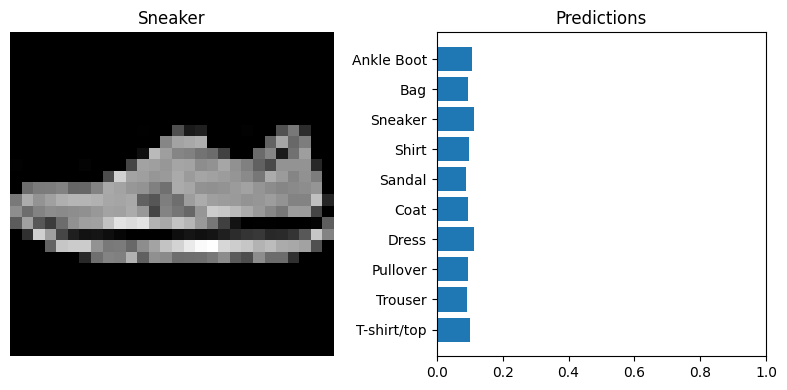

In [ ]:
# ## Uncomment and run the following

model = Classifier(input_size=784, output_size=10)

# # Test on training images (run as many times as you like!)
image, label = next(iter(trainloader))        # Get a random batch of 64 images
predictions = model(image[0].reshape(1, -1))  # Get first image, flatten to shape (1, 784) and predict it
predictions = nn.Softmax(dim=1)(predictions)  # Coerce predictions to probabilities using Softmax()
plot_prediction(image[0], label[0], predictions)

Those predictions look probably pretty bad, because the model is not trained yet.

Below is a training function similar to what we saw in lectures. The only difference is that when I'm creating `y_hat` (model predictions), I'm reshaping my `X` data from `(batch_size, 1, 28, 28)` to `(batch_size, 784)`, so that we can feed it into our network. `X.shape[0]` is the batch size, and the `-1` just says _flatten remaining dimensions into a single dimension_.

In [ ]:
def trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    """Simple training wrapper for PyTorch network."""

    for epoch in range(epochs):
        losses = 0
        for X, y in dataloader:
            optimizer.zero_grad()       # Clear gradients w.r.t. parameters
            y_hat = model(X.reshape(X.shape[0], -1))  # Reshape data to (batch_size, 784) and forward pass to get output
            loss = criterion(y_hat, y)  # Calculate loss
            loss.backward()             # Getting gradients w.r.t. parameters
            optimizer.step()            # Update parameters
            losses += loss.item()       # Add loss for this batch to running total

        if verbose:
            print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")

Now define an appropriate `criterion` and `optimizer` to train your model with.

- We are doing multi-class classification here, what loss function do we use for this case?

- Use any optimizer you like, but I recommend Adam

I already created the dataloader `trainloader` for you at the start of this exercise. Pass all these things to `trainer()` to train your model. Remember that it may take a few minutes to complete.

In [ ]:
# YOUR SOLUTION HERE
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Train the model
trainer(model, criterion, optimizer, trainloader, epochs=5)


epoch: 1, loss: 0.5558
epoch: 2, loss: 0.3815
epoch: 3, loss: 0.3395
epoch: 4, loss: 0.3137
epoch: 5, loss: 0.2939


## 1.4

{reasoning: 1}
Test out your newly trained network on the training data:

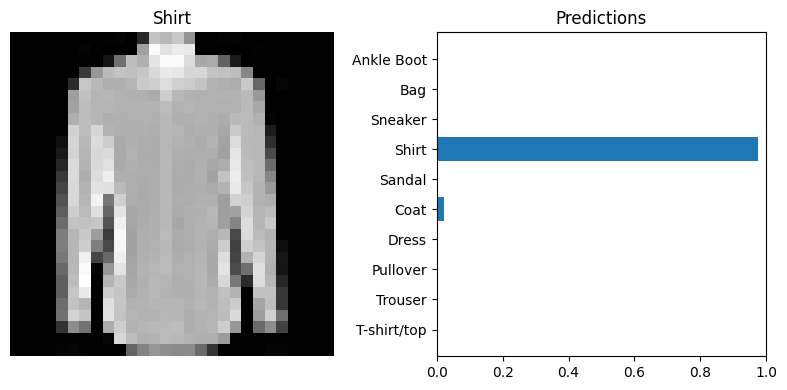

In [ ]:
# ## Uncomment andrunthe following
# # Test model on training images (run as many times as you like!)
image, label = next(iter(trainloader))        # Get a random batch of 64 images

predictions = model(image[0].view(1, -1))     # Get first image, flatten to shape (1, 784) and predict it
predictions = nn.Softmax(dim=1)(predictions)  # Coerce predictions to probabilities using Softmax()
plot_prediction(image[0], label[0], predictions)

And test it out on the test data:

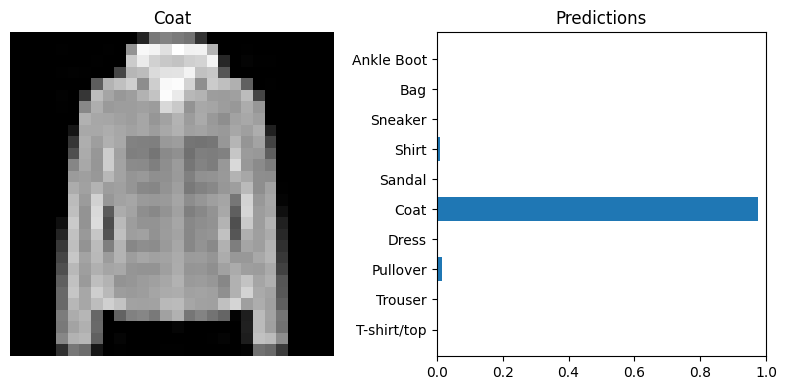

In [ ]:
# ## Uncomment andrunthe following
# # Test model on testing images (run as many times as you like!)
image, label = next(iter(testloader))        # Get a random batch of 64 images
predictions = model(image[0].view(1, -1))     # Get first image, flatten to shape (1, 784) and predict it
predictions = nn.Softmax(dim=1)(predictions)  # Coerce predictions to probabilities using Softmax()
plot_prediction(image[0], label[0], predictions)

Hopefully your predictions look good. You just created your first neural network classifier!

**Now comes the question for you:** In this exercise we used a `BATCH_SIZE = 64`. Describe how choosing a small vs. large batch size affects the convergence of the optimization algorithm, as well as hardware requirements.

In general, a smaller batch size will usually lead to a noisier gradient estimate. This can allow the model to escape local minima, as well as potentially generalize better. Smaller batch size also leads to slower convergence in addition to longer training times. This is due to the fact that the model needs to update more frequently. Smaller batch size also requires less memory.

A larger batch size will generally lead to more accurate gradient estimates. This leads to speedier convergence due to better hardware utilization. Large batch size can also lead to overfitting, as well as getting stuck in local minima. Large batch size also requires significantly more memory.

# QUESTION 2

### Question:

Consider a dataset represented as the following matrix, where each row corresponds to a sample and each column corresponds to a feature:

$$
\
X = \begin{bmatrix}
1 & 2 \\
2 & 3 \\
3 & 4 \\
4 & 5
\end{bmatrix}
$$


You are asked to apply three different kernels on this dataset: linear kernel, polynomial kernel (degree 2), and radial basis function (RBF) kernel. Answer the following:

1. Compute the kernel matrix for the **linear kernel** using $$\( K(x_i, x_j) = x_i^T x_j) \$$

2. Compute the kernel matrix for the **polynomial kernel (degree 2)** using $$\( K(x_i, x_j) = (x_i^T x_j + 1)^2) \$$

3. Describe the behavior of the **RBF kernel** in terms of feature space transformation. You don't need to compute it explicitly but explain how it handles data.


\documentclass{article}
\usepackage{amsmath}
\usepackage{geometry}
\usepackage{graphicx}
\usepackage{booktabs}

\geometry{margin=1in}

\title{Question 2}
\date{}
\begin{document}

\maketitle

\section*{Given}
The dataset is:
\[
X = \begin{bmatrix}
1 & 2 \\
2 & 3 \\
3 & 4 \\
4 & 5
\end{bmatrix}
\]

\section*{1. Linear Kernel}


 $K = X X^\top$:
\[
K_{\text{linear}} =
\begin{bmatrix}
1 & 2 \\
2 & 3 \\
3 & 4 \\
4 & 5
\end{bmatrix}
\begin{bmatrix}
1 & 2 & 3 & 4 \\
2 & 3 & 4 & 5
\end{bmatrix}
=
\begin{bmatrix}
5 & 8 & 11 & 14 \\
8 & 13 & 18 & 23 \\
11 & 18 & 25 & 32 \\
14 & 23 & 32 & 41
\end{bmatrix}
\]

\section*{2. Polynomial Kernel (degree 2)}

K_{\text{poly}} =
\begin{bmatrix}
(5+1)^2 & (8+1)^2 & (11+1)^2 & (14+1)^2 \\
(8+1)^2 & (13+1)^2 & (18+1)^2 & (23+1)^2 \\
(11+1)^2 & (18+1)^2 & (25+1)^2 & (32+1)^2 \\
(14+1)^2 & (23+1)^2 & (32+1)^2 & (41+1)^2 \\
\end{bmatrix}
=
\begin{bmatrix}
36 & 81 & 144 & 225 \\
81 & 196 & 361 & 576 \\
144 & 361 & 676 & 1089 \\
225 & 576 & 1089 & 1764
\end{bmatrix}
\]

\section*{3. RBF Kernel Description}
The Radial Basis Function (RBF) kernel is a method for transforming data into a higher dimensional space. It is defined as:

\[
K(x_i, x_j) = \exp\left(-\gamma \|x_i - x_j\|^2\right)
\]

Characteristics of the RBF kernel:

  It measures similarity between samples based on their Euclidean distance.
  Closer points in input space yield values closer to 1, while distant points produce values near 0.
  Unlike linear or polynomial kernels, the RBF kernel can map data into an infinite-dimensional space, enabling it to handle complex, non-linear decision boundaries.
  It is widely used in support vector machines and kernelized models due to its flexibility and ability to model non-linear relationships.


\end{document}


# QUESTION 3

### Question:

Consider a feedforward neural network with the following characteristics:
- The input feature vector is \( x = [2, -1, 3, 0] \) with 4 features.
- The network has one hidden layer with 3 neurons.
- The activation function for the hidden layer is the ReLU function.
- The output layer has 1 neuron with a sigmoid activation function, representing the probability of the positive class.
- The weights and biases are initialized as follows:
 - For the hidden layer:  
   $$  W^{(1)} = \begin{bmatrix} 0.2 & -0.5 & 0.1 & 0.4 \\ -0.3 & 0.8 & 0.5 & -0.2 \\ 0.7 & -0.4 & 0.2 & 0.1 \end{bmatrix}, \quad b^{(1)} = \begin{bmatrix} 0.1 \\ 0.2 \\ 0.3 \end{bmatrix}  $$
  - For the output layer:  
   $$  W^{(2)} = \begin{bmatrix} 0.5 & -0.6 & 0.3 \end{bmatrix}, \quad b^{(2)} = 0.2 $$


Answer the following questions:

1. **Forward Pass:**
   a. Compute the activations for the hidden layer and the final output of the network. Show all intermediate steps.
   
2. **Backward Pass (Gradient Calculation):**
   a. Assume the true label \( y = 1 \), and the binary cross-entropy loss function is:  
      $\[
      L = -(y \log(f) + (1 - y) \log(1 - f))
      \]$
      Compute the gradient of the loss function \( L \) with respect to the weights of the output layer. Show all steps.
   
3. **Weight Update:**
   a. Using a learning rate of $ \alpha = 0.01 $, write down the gradient descent update rule for the output layer weights. Compute the updated weights after one iteration.

4. **Activation Function Impact:**
   a. If we were to replace the ReLU activation in the hidden layer with a sigmoid activation, how would this change the forward pass? Provide the new expressions but no need to compute the output.

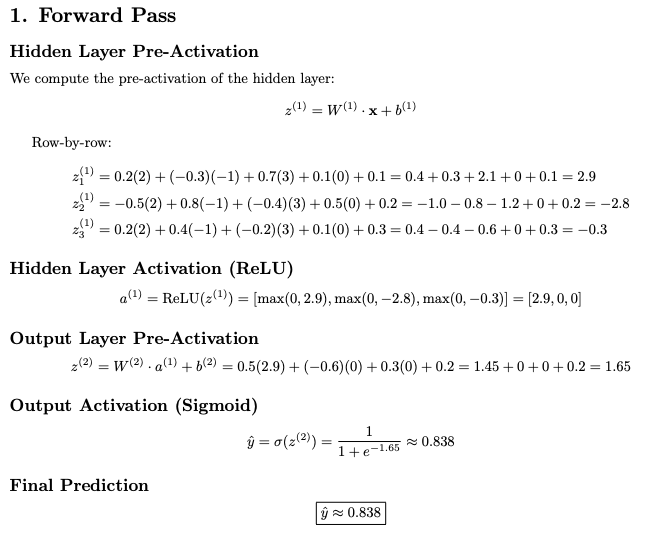

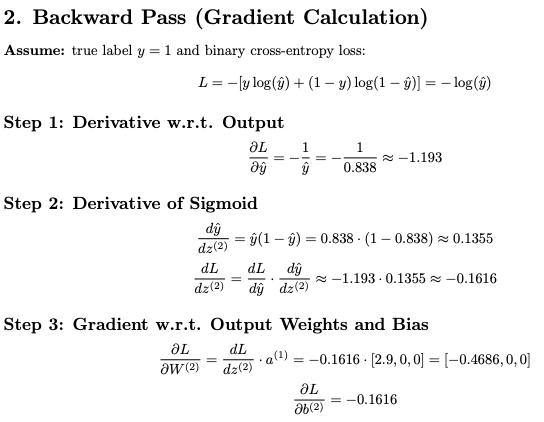

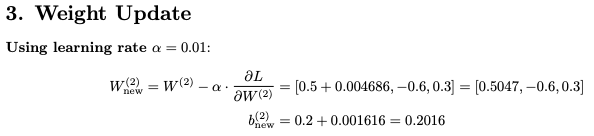

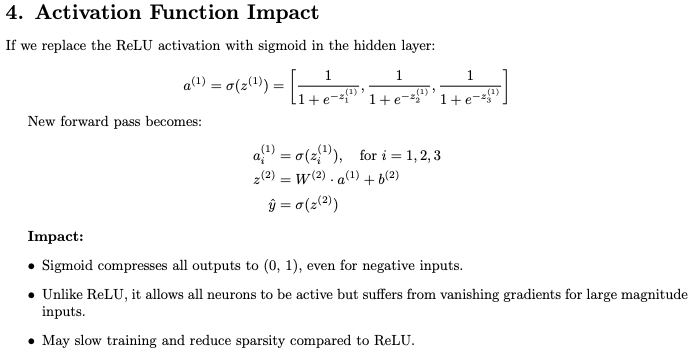

# QUESTION 4

Adam (adaptive moment estimation) is an optimization algorithm that we'll be using a lot for the rest of the course. [Here](https://arxiv.org/abs/1412.6980)'s the original paper that proposed the algorithm. It is essentially a fancier version of SGD. Without getting too technical, Adam really adds two additional features to SGD:

1. Momentum: which uses past gradients to help improve convergence speed, reduce noise in the path to the minimum, and avoid local minima.

2. Per-parameter learning rate: a learning rate is maintained and adapted for each parameter as iterations of optimization proceed.

Recommended: [read this article](https://ruder.io/optimizing-gradient-descent/index.html) to learn more, but Adam boils down to the following weight updating procedure:

$$\mathbf{w}_{t+1} = \mathbf{w}_{t} - \frac{\alpha}{\sqrt{\hat{v}_{t}} + \epsilon} \hat{m}_{t}$$

The various components required for that equation:

$$\begin{align}
\hat{m}_{t} &= \frac{m_{t}}{1 - \beta_{1}^{t}}\\
\hat{v}_{t} &= \frac{v_{t}}{1 - \beta_{2}^{t}}
\end{align}$$

$$\begin{align}
m_{t} &= \beta_{1} m_{t-1} + (1 - \beta_{1}) g_{t}\\
v_{t} &= \beta_{2} v_{t-1} + (1 - \beta_{2}) g_{t}^{2}
\end{align}$$

Where:

- $t$ is the iteration of optimization, it increments up by one each time you update $\mathbf{w}$. Note that in the equation for $\hat{m}_{t}$ and $\hat{v}_{t}$, $\beta_{1}$ and $\beta_{2}$ are raised to the power of $t$.

- $g_{t}$ is the gradient of the loss function w.r.t to the parameters $w$.
- $m_{t}$ is known as the first moment (the mean) of the gradients. In the first iteration, initialize $m_{-1}$ to 0 to get the solution started.
- $v_{t}$ is known as the second moment (the uncentered variance) of the gradients. In the first iteration, initialize $v_{-1}$ to 0 to get the solution started.
- $\alpha$ is the learning rate. 0.1 is a good start.
- $\epsilon$ is just a term to prevent division by zero. Default: $10^{-8}$.
- $\beta_{1}$ is a hyperparameter that controls the influence of past gradients on subsequent updates. Default: $0.9$.
- $\beta_{2}$ is a hyperparameter that controls the influence of past gradients on subsequent updates. Default: $0.999$.

Here's a function with both local and global minima. We know in advance that the global minimum occurs at $w_{opt}=4$. I want you to find this value using Adam optimization and starting at $w \neq w_{opt}$. I've provided you the function (`f()`), the MSE loss w.r.t this function (`loss()`), and the gradient of the loss (`loss_grad()`). Run the cell below:

#### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

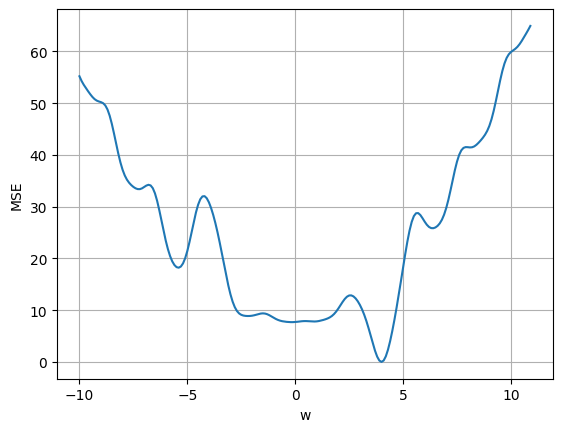

In [ ]:
def f(w, X):
    """Squiggly function"""
    return w * np.cos(w * X)

def loss(w, X, y):
    """MSE loss."""
    return np.mean((f(w, X) - y) ** 2)

def loss_grad(w, X, y):
    """Gradient of MSE."""
    t = np.cos(w * X) - w * X * np.sin(w * X)
    return np.mean((f(w, X) - y) * t)

w_opt = 4
X = np.arange(-3, 3, 0.1)
y = f(w_opt, X)
l = [loss(w, X, y) for w in np.arange(-10, 11, 0.1)]

plt.plot(np.arange(-10, 11, 0.1), l)
plt.xlabel("w")
plt.ylabel("MSE")
plt.grid(True);

Your task here is to implement Adam from scratch. Then use it to find $w_{opt}$ for the above function. Some code has been provided below that you should run when you're ready. Note that:

-  A default of 100 epochs is specified. We have a *tiny* dataset here of 60 samples so this is nothing substantial. Feel free to add more epochs if you wish.

- You can start with the default values for the various Adam terms I give in the equations above.
- You *may* need to play around with the hyperparameter $\alpha$ to get to the minimum (I've given a default of 0.3 in the starter code below. I didn't need to change this value in my solution). You can leave $\beta_{1}$, $\beta_{2}$ as is - Often we don't tune those ones and I didn't in my solution, but you can tune them if you want.
- Adam uses batches just like SGD, so my solution has the ability to accept a `batch_size` argument. But you don't have to implement this functionality and I didn't include that argument in the starter code below. So feel free to just use all the data each iteration for simplicity like vanilla GD would do. If you're feeling adventurous, no one should stop you from throwing in a `batch_size` argument.

The pedagogical goal here is to get you to implement Adam and play around with it to see how it can **jump over** local minima.

_Points:_ 2

In [ ]:
def Adam(X, y, w0, loss, loss_grad, n_epochs=100, batch_size=1, alpha=0.3, beta1=0.9, beta2=0.999, eta=10e-8, verbose=False):
    w = w0.astype(float)
    m = 0  # First moment estimate
    v = 0  # Second moment estimate
    t = 0  # Time step

    for epoch in range(1, n_epochs + 1):
        t += 1
        grad = loss_grad(w, X, y)

        # Update biased first and second moment estimates
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * (grad ** 2)

        # Bias correction
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)

        # Parameter update
        w = w - alpha * m_hat / (np.sqrt(v_hat) + eta)

        if verbose and epoch % 10 == 0:
            print(f"Epoch {epoch}: w = {w}, loss = {loss(w, X, y):.4f}")

    return w

In [ ]:
w0 = np.array([9])
w = Adam(X, y, w0, loss, loss_grad)
print(w)  # Should be close to 4

[3.98756737]


Final weight (Adam): [3.98756737]
Final weight (SGD): [8.12500757]


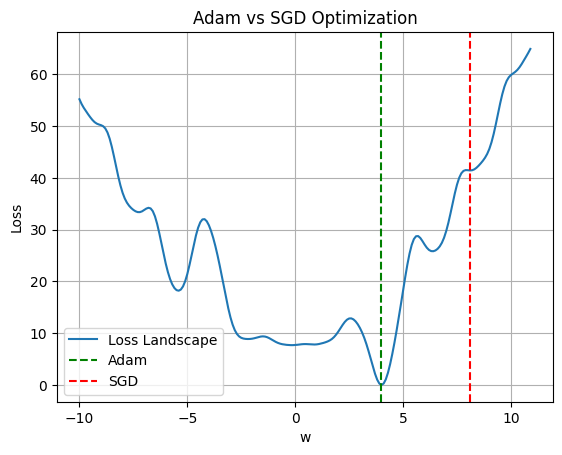

In [ ]:
def SGD(X, y, w0, loss, loss_grad, n_epochs=100, alpha=0.01):
    w = w0.astype(float)
    for _ in range(n_epochs):
        grad = loss_grad(w, X, y)
        w = w - alpha * grad
    return w

# Run both
w_adam = Adam(X, y, np.array([9]), loss, loss_grad, n_epochs=100)
w_sgd = SGD(X, y, np.array([9]), loss, loss_grad, n_epochs=100)

print("Final weight (Adam):", w_adam)
print("Final weight (SGD):", w_sgd)

# Plot loss landscape and results
import matplotlib.pyplot as plt

w_vals = np.arange(-10, 11, 0.1)
loss_vals = [loss(np.array([w]), X, y) for w in w_vals]

plt.plot(w_vals, loss_vals, label='Loss Landscape')
plt.axvline(x=w_adam[0], color='g', linestyle='--', label='Adam')
plt.axvline(x=w_sgd[0], color='r', linestyle='--', label='SGD')
plt.xlabel('w')
plt.ylabel('Loss')
plt.legend()
plt.title("Adam vs SGD Optimization")
plt.grid(True)
plt.show()
